In [128]:
#To find the month which has the highest total rainfall from 2001 to 2021
#To find the month which has the highest number of days of rainfall from 2001 to 2021
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:
df1 = pd.read_csv('../data/rainfall-monthly-highest-daily-total.csv')
df2 = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
df3 = pd.read_csv('../data/rainfall-monthly-total.csv')
print(df1.head(5))
print(df2.head(5))
print(df3.head(5))
df1['maximum_rainfall_in_a_day'] = df1['maximum_rainfall_in_a_day'].replace('na', np.nan)
df2['no_of_rainy_days'] = df2['no_of_rainy_days'].replace('na', np.nan)
df3['total_rainfall'] = df3['total_rainfall'].replace('na', np.nan)

# Drop null values based on t1s, revise if too much
df1 = df1[df1['maximum_rainfall_in_a_day'].notna()]
df2 = df2[df2['no_of_rainy_days'].notna()]
df3 = df3[df3['total_rainfall'].notna()]

     month  maximum_rainfall_in_a_day
0  1982-01                       36.5
1  1982-02                        9.4
2  1982-03                       61.7
3  1982-04                       45.1
4  1982-05                       33.0
     month  no_of_rainy_days
0  1982-01                10
1  1982-02                 5
2  1982-03                11
3  1982-04                14
4  1982-05                10
     month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2


In [130]:
df4 = pd.merge(df1,df2, how ='left')
df5 = pd.merge(df4,df3, how = 'left')

df5.to_csv("../data/merged_df.csv")
df5 = df5.dropna()
df5

,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall
0,1982-01,36.5,10.0,107.1
1,1982-02,9.4,5.0,27.8
2,1982-03,61.7,11.0,160.8
3,1982-04,45.1,14.0,157.0
4,1982-05,33.0,10.0,102.2
...,...,...,...,...
483,2022-04,58.8,18.0,239.6
484,2022-05,44.6,12.0,102.0
485,2022-06,59.4,17.0,211.8
486,2022-07,27.8,16.0,145.2


In [146]:
year = df5["month"].values
year1 = [my_str.split("-")[0] for my_str in year]
month1 = [my_str.split("-")[1] for my_str in year]
df5['year']=year1
df5['only_month'] = month1
df5

,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,year,only_month
0,1982-01,36.5,10.0,107.1,1982,01
1,1982-02,9.4,5.0,27.8,1982,02
2,1982-03,61.7,11.0,160.8,1982,03
3,1982-04,45.1,14.0,157.0,1982,04
4,1982-05,33.0,10.0,102.2,1982,05
...,...,...,...,...,...,...
483,2022-04,58.8,18.0,239.6,2022,04
484,2022-05,44.6,12.0,102.0,2022,05
485,2022-06,59.4,17.0,211.8,2022,06
486,2022-07,27.8,16.0,145.2,2022,07


In [147]:
#1Which month have the highest total rainfall from 2001 to 2021?
import calendar
cat = df5.groupby("year")
 
cat_year = [str(year) for year in range(2001, 2022)]

v2_list=[]
for i in cat_year:
       df = cat.get_group(i)
       v1 = cat.get_group(i)['total_rainfall'].max()
       v2 = df['only_month'][df.index[df.total_rainfall == v1][0]]
       v2_list.append(v2)
       #print(i,v2)
    
from collections import Counter
Counter(v2_list)

Counter({'12': 8, '01': 5, '11': 4, '08': 1, '07': 1, '02': 1, '05': 1})

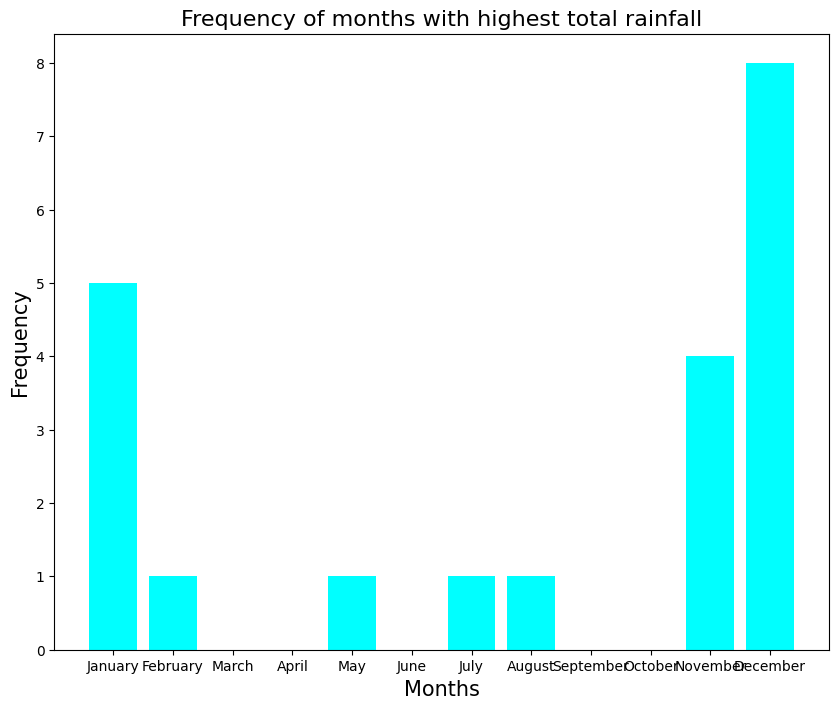

In [197]:
import datetime
from collections import Counter
Counter1 = Counter(v2_list)
highest_total_rainfall_dict = {'01':5,'02':1,'03':0, '04':0,'05':1,'06':0,'07':1,'08':1,'09':0,'10':0,'11':4,'12':8}
data_x1=[]
data_y1 = []
# repackage data into array-like for matplotlib
for key, value in highest_total_rainfall_dict.items():
    data_x1.append(int(key))
    data_y1.append(value)

cc=['colors']*len(data_y1)
for n,val in enumerate(data_y1):
    if value == 8:
        cc[n] = 'aqua'
    elif value == 7:
        cc[n] = 'blueviolet'
    elif value == 6:
       cc[n] ='orange'
    elif value == 5:
       cc[n] = 'dark blue'
    elif value == 4:
        cc[n] = 'violet'
    elif value == 3:
        cc[n] = 'yellow'
    elif value == 2:
        cc[n] = 'yellow'
    else:
        cc[n] = 'violet'
# display bar plot data
y = list(map(int, data_y1))
x = data_x1
plt.figure(figsize=(10,8))
months = [datetime.date(2000, month, 1).strftime('%B') for month in range(1, 13)]
plt.xticks(x, months)
plt.title('Frequency of months with highest total rainfall', fontsize =16)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.bar(x, y, color =cc)
plt.show()

In [149]:
#1Which month have the highest number of rainy days from 2001 to 2021?
v4_list=[]
for i in cat_year:
       df = cat.get_group(i)
       v3 = cat.get_group(i)['no_of_rainy_days'].max()
       v4 = df['only_month'][df.index[df.no_of_rainy_days == v3][0]]
       v4_list.append(v4)
Counter(v4_list)

Counter({'11': 8,
         '12': 4,
         '01': 2,
         '07': 2,
         '10': 1,
         '03': 1,
         '02': 1,
         '06': 1,
         '08': 1})

In [150]:
highest_no_of_rainy_days= {'01':2,'02':1,'03':1, '04':0,'05':0,'06':1,'07':2,'08':1,'09':0,'10':1,'11':8,'12':4}


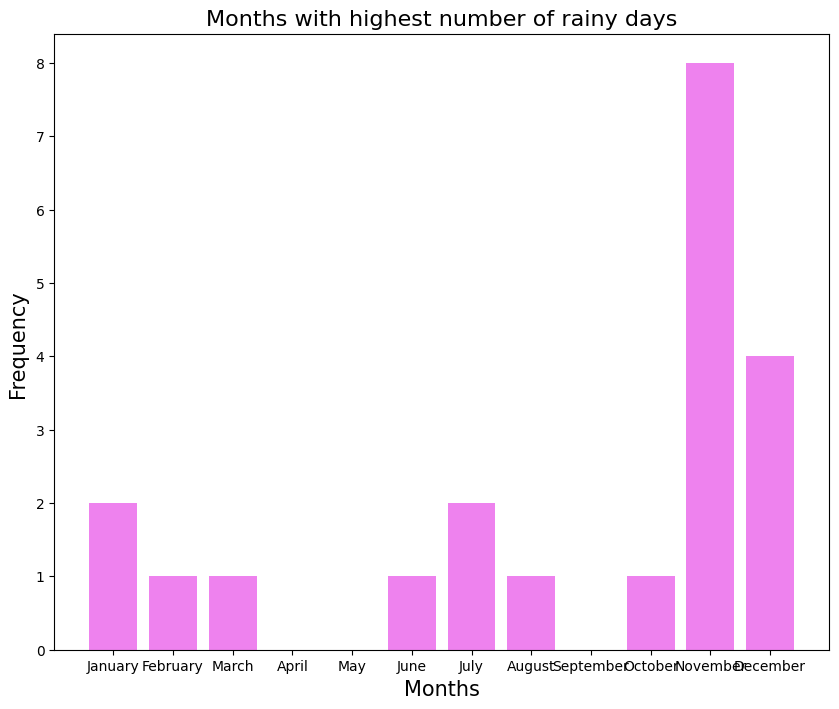

In [140]:
data_x3 = []
data_y3 = []
# repackage data into array-like for matplotlib 
for key, value in highest_no_of_rainy_days.items():
    data_x3.append(int(key))
    data_y3.append(value)
data_y3 = list(map(int, data_y3))
y = data_y3
x = data_x3
cc=['colors']*len(y)
for n,val in enumerate(y):
    if value == 8:
        cc[n] = 'violet'
    elif value == 7:
        cc[n] = 'blueviolet'
    elif value == 6:
       cc[n] ='orange'
    elif value == 5:
       cc[n] = 'dark blue'
    elif value == 4:
        cc[n] = 'violet'
    elif value == 3:
        cc[n] = 'yellow'
    elif value == 2:
        cc[n] = 'yellow'
    else: 
        cc[n] = 'violet' 
# display bar plot data
plt.figure(figsize=(10,8))
months = [datetime.date(2000, month, 1).strftime('%B') for month in range(1, 13)]
plt.xticks(x, months)
plt.title('Months with highest number of rainy days', fontsize=16)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Frequency ', fontsize=15)
plt.bar(x, y, color = cc)
# Show plot
plt.show()

In [122]:
#from the two bar charts, it can be concluded that from year 2001 to 2021, November, December and Jan have the highest total rainfall.
and highest number of rainy days.

In [170]:
#Further data are downloaded from Meteorology Service Singapore from Historical Daily Records
#reading csv file of maximum highest daily for month of Jan from 2014 to 2022
df8 = pd.read_csv('../data/Jan.csv')
df8.head()

,Station,Year,Month,Day,Highest 60 Min Rainfall (mm)
0,Changi,2014,1,1,0.0
1,Changi,2014,1,2,0.0
2,Changi,2014,1,3,0.0
3,Changi,2014,1,4,0.0
4,Changi,2014,1,5,10.8


In [171]:
df8.columns

Index(['Station', 'Year', 'Month', 'Day', 'Highest 60 Min Rainfall (mm)'], dtype='object')

In [173]:
#Find the mean of rainfall intensity greater than 10 in month of Jan
bool_array = (df8['Highest 60 Min Rainfall (mm)'] > 10) 
# select rows where bool_array is True
subset = df8[bool_array]
#print(subset)

In [92]:
print(subset['Highest 60 Min Rainfall (mm)'].describe())
subset['Highest 60 Min Rainfall (mm)'].sort_values().values

count    31.000000
mean     20.458065
std       9.297339
min      10.600000
25%      11.800000
50%      18.200000
75%      28.800000
max      40.200000
Name: Highest 60 Min Rainfall (mm), dtype: float64


array([10.6, 10.8, 10.8, 10.8, 10.8, 11.4, 11.6, 11.8, 11.8, 12.2, 13.4,
       13.6, 14.6, 15.2, 15.8, 18.2, 18.6, 21.6, 22.2, 22.4, 24. , 27.2,
       28.2, 29.4, 29.6, 30.6, 31. , 34. , 35. , 36.8, 40.2])

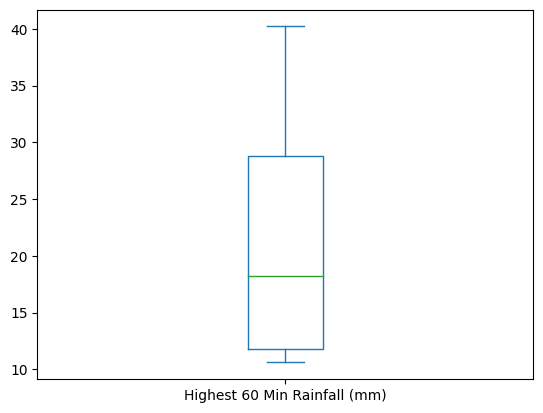

In [91]:
subset['Highest 60 Min Rainfall (mm)'].plot(kind='box');

In [85]:
subset.count()
#there are at least 3 days in Jan per year where rainfall intensity is more than 10 mmh-1 

Station                         31
Year                            31
Month                           31
Day                             31
Highest 60 Min Rainfall (mm)    31
dtype: int64

In [180]:
df9 = pd.read_csv('../data/Nov.csv')
df9.head()

,Station,Year,Month,Day,Highest 60 Min Rainfall (mm)
0,Changi,2014,11,1,4.4
1,Changi,2014,11,2,0.0
2,Changi,2014,11,3,0.0
3,Changi,2014,11,4,0.0
4,Changi,2014,11,5,20.2


In [181]:
bool_array = (df9['Highest 60 Min Rainfall (mm)'] > 10) 
# select rows where bool_array is True
subset1 = df9[bool_array]
subset1

,Station,Year,Month,Day,Highest 60 Min Rainfall (mm)
4,Changi,2014,11,5,20.2
7,Changi,2014,11,8,20.0
12,Changi,2014,11,13,60.4
14,Changi,2014,11,15,11.4
25,Changi,2014,11,26,38.4
53,Changi,2015,11,24,18.0
59,Changi,2015,11,30,25.4
60,Changi,2016,11,1,23.0
62,Changi,2016,11,3,18.0
68,Changi,2016,11,9,45.2


In [182]:
print(subset1['Highest 60 Min Rainfall (mm)'].describe())
subset1['Highest 60 Min Rainfall (mm)'].sort_values().values

count    48.000000
mean     24.795833
std      13.349093
min      10.400000
25%      13.550000
50%      20.100000
75%      32.850000
max      60.400000
Name: Highest 60 Min Rainfall (mm), dtype: float64


array([10.4, 10.6, 10.8, 11. , 11.4, 11.4, 11.8, 12. , 12.4, 13.4, 13.4,
       13.4, 13.6, 14.6, 15. , 16.2, 16.4, 16.6, 18. , 18. , 18. , 18.8,
       19.8, 20. , 20.2, 21.6, 22.8, 23. , 24. , 24.6, 25.4, 27. , 27.4,
       28. , 31.6, 32.6, 33.6, 34. , 38.4, 39. , 39.8, 44.6, 45.2, 46.4,
       48.8, 52. , 52.8, 60.4])

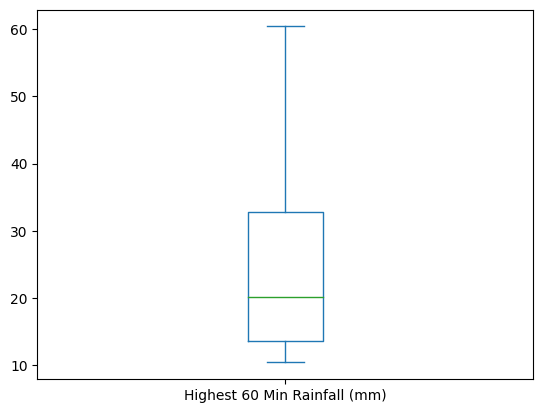

In [183]:
subset1['Highest 60 Min Rainfall (mm)'].plot(kind='box');

In [184]:
subset1.count()
#all year have between 2 to 6 days in a month where rainfall intensity is greater than 10 mmh-1
# year 2021,2022 has 8 days

Station                         48
Year                            48
Month                           48
Day                             48
Highest 60 Min Rainfall (mm)    48
dtype: int64

In [185]:
df10 = pd.read_csv('../data/Dec.csv')
df10.head()

,Station,Year,Month,Day,Highest 60 Min Rainfall (mm)
0,Changi,2014,12,1,22.8
1,Changi,2014,12,2,0.0
2,Changi,2014,12,3,0.0
3,Changi,2014,12,4,9.2
4,Changi,2014,12,5,0.0


In [186]:
bool_array = (df10['Highest 60 Min Rainfall (mm)'] > 10) 
# select rows where bool_array is True
subset2 = df10[bool_array]

In [188]:
subset2.count()

Station                         56
Year                            56
Month                           56
Day                             56
Highest 60 Min Rainfall (mm)    56
dtype: int64

In [189]:
subset2['Highest 60 Min Rainfall (mm)']. mean()

22.728571428571428

In [191]:
print(subset2['Highest 60 Min Rainfall (mm)'].describe())
subset2['Highest 60 Min Rainfall (mm)'].sort_values().values

count    56.000000
mean     22.728571
std      11.468434
min      10.200000
25%      13.800000
50%      19.300000
75%      26.300000
max      61.000000
Name: Highest 60 Min Rainfall (mm), dtype: float64


array([10.2, 10.6, 11. , 11.2, 11.4, 11.6, 12.8, 12.8, 13. , 13. , 13.2,
       13.4, 13.6, 13.8, 13.8, 14. , 14. , 14.8, 15. , 15.8, 16.8, 17.2,
       17.2, 17.6, 18. , 18.2, 18.6, 19.2, 19.4, 20. , 20.4, 20.4, 21.4,
       22.8, 23. , 23.2, 24.2, 25.6, 26. , 26. , 26.2, 26.2, 26.6, 28.4,
       29.2, 31.6, 32.8, 33. , 36.6, 39. , 41.4, 43. , 43.6, 47.2, 52.8,
       61. ])

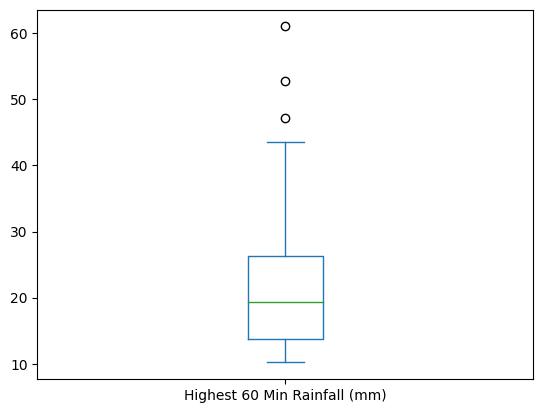

In [192]:
subset2['Highest 60 Min Rainfall (mm)'].plot(kind='box');

In [193]:
df11 = pd.read_csv('../data/All_Mths_Jan_Nov_Dec.csv')
df11.head()

,Station,Year,Month,Day,Highest 60 Min Rainfall (mm)
0,Changi,2014,1,1,0.0
1,Changi,2014,1,2,0.0
2,Changi,2014,1,3,0.0
3,Changi,2014,1,4,0.0
4,Changi,2014,1,5,10.8


In [194]:
bool_array = (df11['Highest 60 Min Rainfall (mm)'] > 10) 
# select rows where bool_array is True
subset3 = df11[bool_array]

In [118]:
print(subset3['Highest 60 Min Rainfall (mm)'].describe())
subset3['Highest 60 Min Rainfall (mm)'].sort_values().values

count    135.000000
mean      22.942222
std       11.769296
min       10.200000
25%       13.400000
50%       19.400000
75%       28.800000
max       61.000000
Name: Highest 60 Min Rainfall (mm), dtype: float64


array([10.2, 10.4, 10.6, 10.6, 10.6, 10.8, 10.8, 10.8, 10.8, 10.8, 11. ,
       11. , 11.2, 11.4, 11.4, 11.4, 11.4, 11.6, 11.6, 11.8, 11.8, 11.8,
       12. , 12.2, 12.4, 12.8, 12.8, 13. , 13. , 13.2, 13.4, 13.4, 13.4,
       13.4, 13.4, 13.6, 13.6, 13.6, 13.8, 13.8, 14. , 14. , 14.6, 14.6,
       14.8, 15. , 15. , 15.2, 15.8, 15.8, 16.2, 16.4, 16.6, 16.8, 17.2,
       17.2, 17.6, 18. , 18. , 18. , 18. , 18.2, 18.2, 18.6, 18.6, 18.8,
       19.2, 19.4, 19.8, 20. , 20. , 20.2, 20.4, 20.4, 21.4, 21.6, 21.6,
       22.2, 22.4, 22.8, 22.8, 23. , 23. , 23.2, 24. , 24. , 24.2, 24.6,
       25.4, 25.6, 26. , 26. , 26.2, 26.2, 26.6, 27. , 27.2, 27.4, 28. ,
       28.2, 28.4, 29.2, 29.4, 29.6, 30.6, 31. , 31.6, 31.6, 32.6, 32.8,
       33. , 33.6, 34. , 34. , 35. , 36.6, 36.8, 38.4, 39. , 39. , 39.8,
       40.2, 41.4, 43. , 43.6, 44.6, 45.2, 46.4, 47.2, 48.8, 52. , 52.8,
       52.8, 60.4, 61. ])

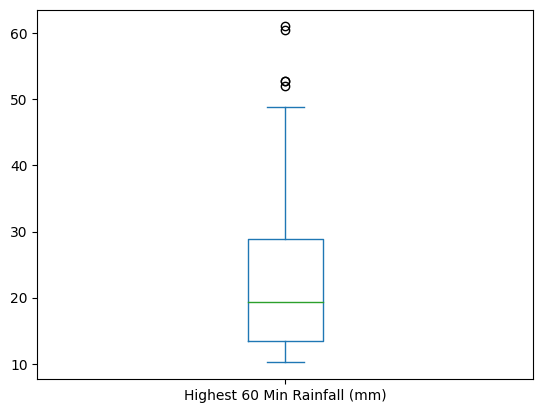

In [120]:
subset3['Highest 60 Min Rainfall (mm)'].plot(kind='box');

In [196]:
bool_array = (df11['Highest 60 Min Rainfall (mm)'] > 19) 
# select rows where bool_array is True
subset5 = df11[bool_array]
subset5.count()

Station                         69
Year                            69
Month                           69
Day                             69
Highest 60 Min Rainfall (mm)    69
dtype: int64

In [ ]:
#There are only 69 days from 2014 to 2021 from Jan, Nov,Dec where rainfall intensity is greater than 10 mmh-1